In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import morty 
from benfordslaw import benfordslaw

In [2]:
#Initialize
bl = benfordslaw(alpha=0.5)

In [3]:
#dataset 
df = pd.read_csv('datasets/brasil.io/caso_full.csv', sep=',')

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=12337.6


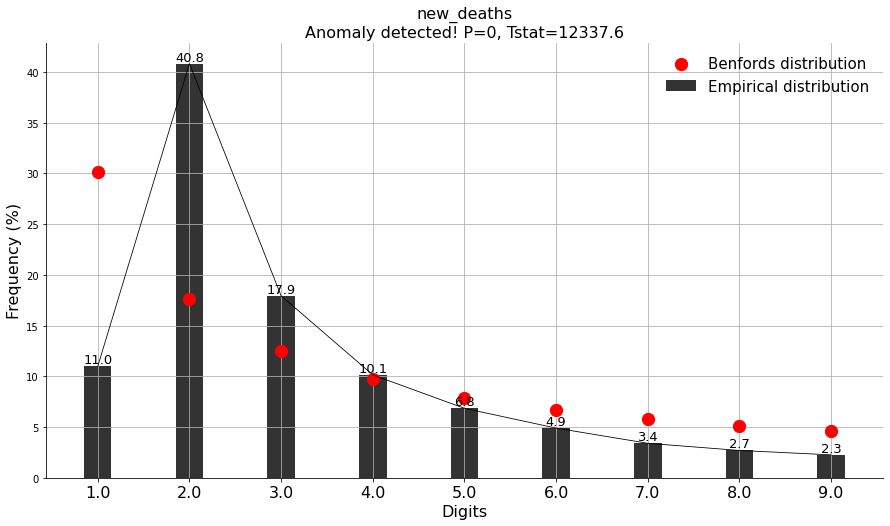

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'new_deaths\nAnomaly detected! P=0, Tstat=12337.6'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [11]:
#New Deaths / benford
X = df['new_deaths'].values

result = bl.fit(X)

bl.plot(title='new_deaths')

In [ ]:
#New Confirmed / Benford
X = df['new_confirmed'].values

result = bl.fit(X)

bl.plot(title='new_confirmed')

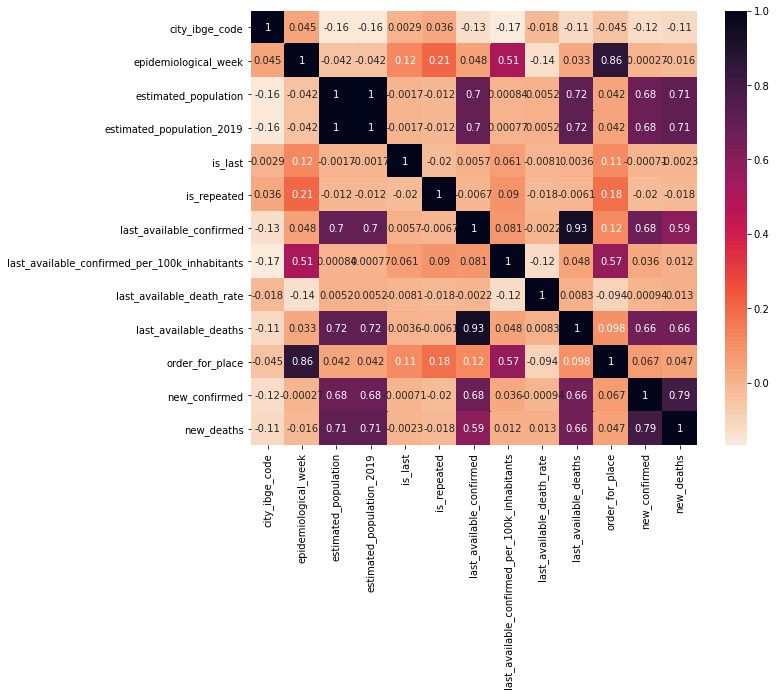

In [7]:
#Mapa de Calor
morty.heatmap(df, 'new_confirmed')

In [ ]:
#Somar dados de COVID-19 por dia
df_new_sum = morty.sum_data_date(df)

In [ ]:
#New Confirmed Sum Date / Benford
X = df_new_sum['new_confirmed'].values

result = bl.fit(X)

bl.plot(title='new_confirmed')

In [ ]:
#Delete is null city 
df_no_city_null = morty.delete_isnull_city(df)

X = df_no_city_null['new_confirmed'].values

result = bl.fit(X)

bl.plot(title='new_confirmed')

In [8]:
#Test dataset Ministério da Saúde
df_minsaude = pd.read_csv('datasets/minsaude/HIST_PAINEL_COVIDBR_19jan2021.csv', sep=';')

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=45828.1


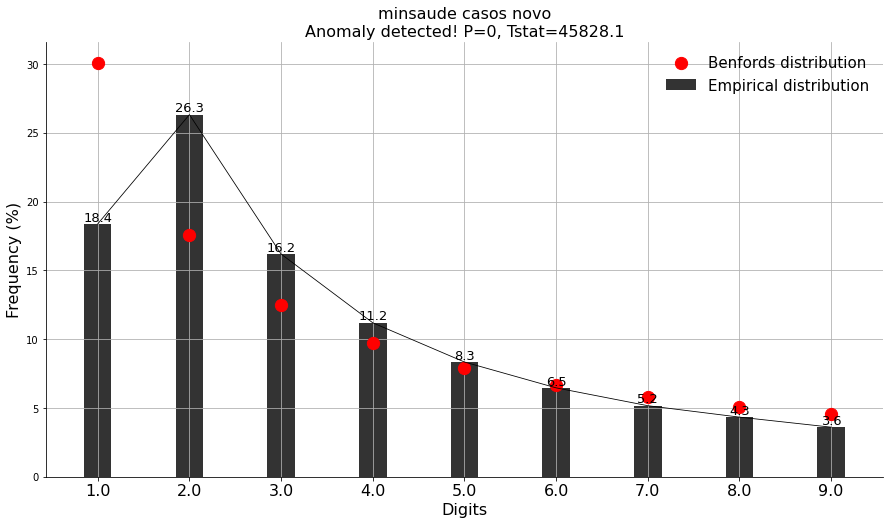

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'minsaude casos novo\nAnomaly detected! P=0, Tstat=45828.1'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [23]:
#bl df_minsaude
X = df_minsaude['casosNovos'].values

result = bl.fit(X)

bl.plot(title='minsaude casos novo')

[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=60618


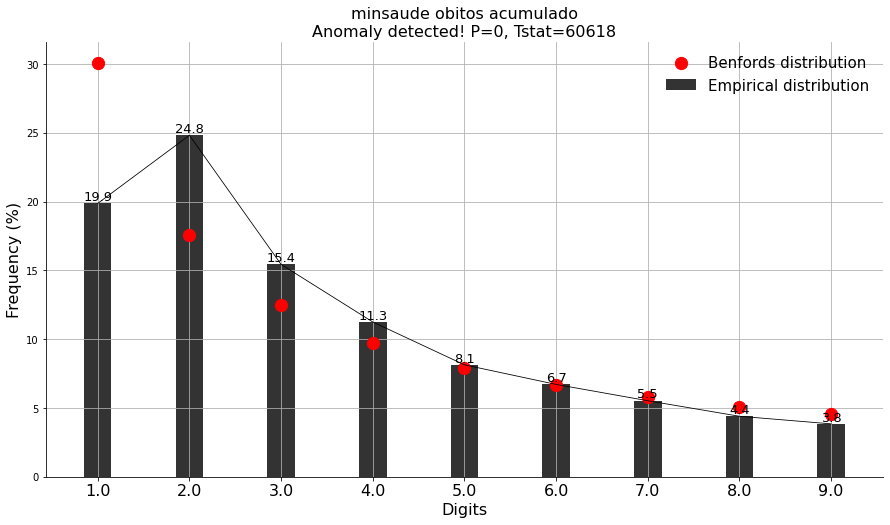

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'minsaude obitos acumulado\nAnomaly detected! P=0, Tstat=60618'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [22]:
#bl df_minsaude obitosAcumulado
X = df_minsaude['obitosAcumulado'].values

result = bl.fit(X)

bl.plot(title='minsaude obitos acumulado')

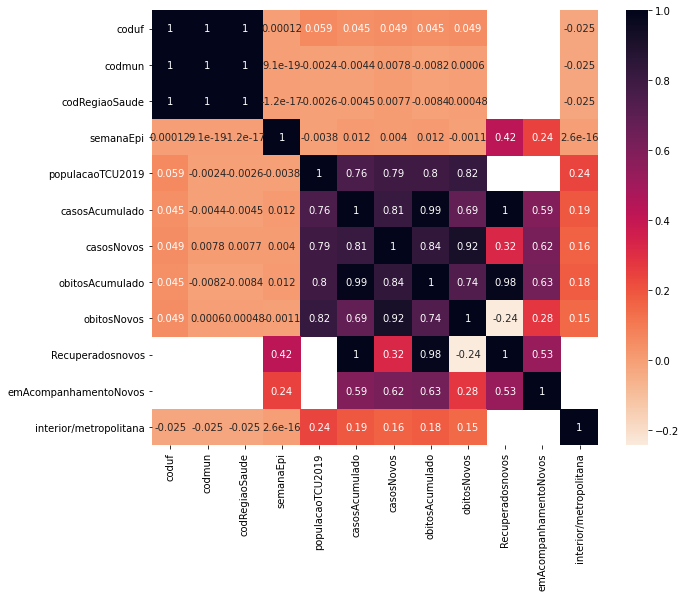

In [9]:
#Mapa de Calor de df_minsaude
morty.heatmap(df_minsaude, 'casosNovos')

In [13]:
#Test dataset Cartório Registro Civil
df_regcivil = pd.read_csv('datasets/regcivil/obitos-2020.csv', sep=',')

[benfordslaw] >[chi2] Anomaly detected! P=9.0697e-137, Tstat=657.707


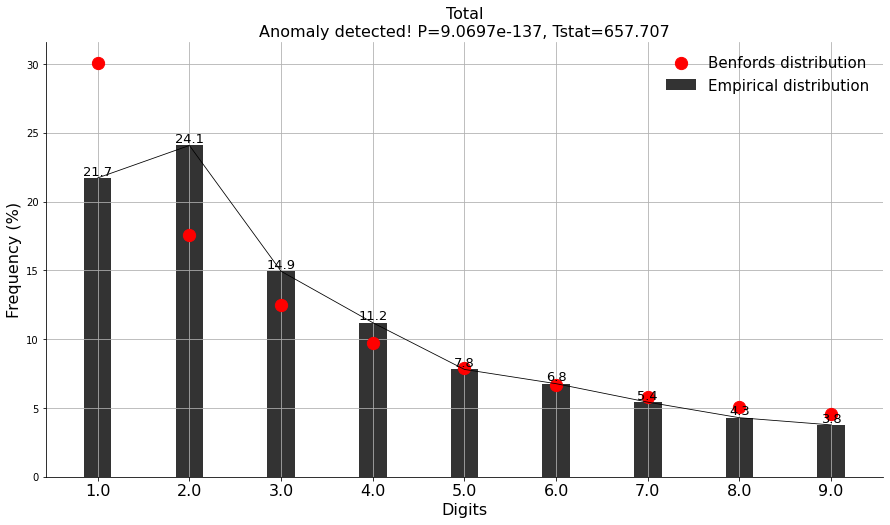

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Total\nAnomaly detected! P=9.0697e-137, Tstat=657.707'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [32]:
#bl df_regcivil total
X = df_regcivil['total'].values

result = bl.fit(X)

bl.plot(title='Total')

In [4]:
#Teste Qui-Quadrado 
N = df['new_deaths'].values
tabulated = 15.51
qq = morty.teste(N,tabulated)

In [5]:
x2, compare = qq.quiquadrado()